# 소년범 재범 발생 기간 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import re
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family='Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus=False)

### 자료 불러오기

In [2]:
dt1 = pd.read_csv('./data/09_소년범재범발생기간분석_김관회.csv', encoding='utf8')
dt1.head(10)

,범죄별(1),범죄별(2),범죄별(3),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16
0,범죄별(1),범죄별(2),범죄별(3),합계,동종재범,동종재범,동종재범,동종재범,동종재범,동종재범,동종재범,동종재범,이종재범,이종재범,이종재범,이종재범,이종재범,이종재범,이종재범,이종재범
1,범죄별(1),범죄별(2),범죄별(3),소계,소계,1개월 이내,3개월 이내,6개월 이내,1년 이내,2년 이내,3년 이내,3년 초과,소계,1개월 이내,3개월 이내,6개월 이내,1년 이내,2년 이내,3년 이내,3년 초과
2,합계,소계,소계,26459,13013,2165,2481,2017,3816,1503,801,230,13446,1978,2427,1862,4125,1765,928,361
3,형법범,소계,소계,21911,11037,1957,2187,1699,3204,1159,643,188,10874,1773,2089,1555,3205,1308,674,270
4,형법범,재산범죄,소계,13236,6821,1520,1469,1013,1917,515,302,85,6415,1332,1375,947,1787,559,284,131
5,형법범,재산범죄,절도,7897,4037,960,834,611,1113,316,159,44,3860,900,896,615,978,300,121,50
6,형법범,재산범죄,장물,75,36,7,9,6,9,2,1,2,39,7,10,7,7,2,4,2
7,형법범,재산범죄,사기,4344,2351,500,552,340,680,143,104,32,1993,352,385,266,630,182,117,61
8,형법범,재산범죄,횡령,459,206,26,28,33,67,29,21,2,253,33,35,27,92,38,19,9
9,형법범,재산범죄,배임,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


### 컬럼 지정 : 범죄별 1, 2, 3 대분류

In [3]:
dt1 = dt1.rename(columns=(dt1.iloc[0]+dt1.iloc[1]))
dt1 = dt1.drop(dt1.index[:2])
dt1 = dt1.rename(columns={'범죄별(1)범죄별(1)':'범죄별(1)', '범죄별(2)범죄별(2)':'범죄별(2)', '범죄별(3)범죄별(3)':'범죄별(3)', '합계소계':'합계'})
dt1.head(10)

,범죄별(1),범죄별(2),범죄별(3),합계,동종재범소계,동종재범1개월 이내,동종재범3개월 이내,동종재범6개월 이내,동종재범1년 이내,동종재범2년 이내,동종재범3년 이내,동종재범3년 초과,이종재범소계,이종재범1개월 이내,이종재범3개월 이내,이종재범6개월 이내,이종재범1년 이내,이종재범2년 이내,이종재범3년 이내,이종재범3년 초과
2,합계,소계,소계,26459,13013,2165,2481,2017,3816,1503,801,230,13446,1978,2427,1862,4125,1765,928,361
3,형법범,소계,소계,21911,11037,1957,2187,1699,3204,1159,643,188,10874,1773,2089,1555,3205,1308,674,270
4,형법범,재산범죄,소계,13236,6821,1520,1469,1013,1917,515,302,85,6415,1332,1375,947,1787,559,284,131
5,형법범,재산범죄,절도,7897,4037,960,834,611,1113,316,159,44,3860,900,896,615,978,300,121,50
6,형법범,재산범죄,장물,75,36,7,9,6,9,2,1,2,39,7,10,7,7,2,4,2
7,형법범,재산범죄,사기,4344,2351,500,552,340,680,143,104,32,1993,352,385,266,630,182,117,61
8,형법범,재산범죄,횡령,459,206,26,28,33,67,29,21,2,253,33,35,27,92,38,19,9
9,형법범,재산범죄,배임,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
10,형법범,재산범죄,손괴,461,191,27,46,23,48,25,17,5,270,40,49,32,80,37,23,9
11,형법범,강력범죄(흉악),소계,874,394,37,64,71,125,46,41,10,480,51,64,63,149,74,56,23


### 범죄별1 : 형법, 특별법 분류
### 범죄별2 : 범죄별1의 종류 분류
### 범죄별3 : 범죄별2의 소계 값 분류
### 형법범 내에서 '동종 재범'과 '이종 재범' 분류

In [4]:
dt1_1 = dt1[dt1['범죄별(1)']=='형법범']
dt1_1 = dt1_1.drop(dt1_1.index[0])
dt1_1_1 = dt1_1[['범죄별(1)','범죄별(2)','범죄별(3)','동종재범소계','동종재범1개월 이내','동종재범3개월 이내','동종재범6개월 이내','동종재범1년 이내','동종재범2년 이내','동종재범3년 이내','동종재범3년 초과']]
dt1_1_1 = dt1_1_1[dt1_1_1['범죄별(3)']=='소계']
dt1_1_1 = dt1_1_1.replace('-','0')
dt1_1_1 =pd.DataFrame(dt1_1_1)
dt1_1_1

,범죄별(1),범죄별(2),범죄별(3),동종재범소계,동종재범1개월 이내,동종재범3개월 이내,동종재범6개월 이내,동종재범1년 이내,동종재범2년 이내,동종재범3년 이내,동종재범3년 초과
4,형법범,재산범죄,소계,6821,1520,1469,1013,1917,515,302,85
11,형법범,강력범죄(흉악),소계,394,37,64,71,125,46,41,10
16,형법범,강력범죄(폭력),소계,3313,342,567,544,1020,508,257,75
25,형법범,위조범죄,소계,199,18,27,25,61,39,21,8
30,형법범,공무원범죄,소계,0,0,0,0,0,0,0,0
35,형법범,풍속범죄,소계,18,1,2,3,6,4,2,0
39,형법범,과실범죄,소계,16,1,7,2,2,2,1,1
43,형법범,기타형법범죄,소계,276,38,51,41,73,45,19,9


In [5]:
dt1_1_1['동종재범소계'] = dt1_1_1['동종재범소계'].astype(float)
dt1_1_1['동종재범1개월 이내'] = dt1_1_1['동종재범1개월 이내'].astype(float)
dt1_1_1['동종재범3개월 이내'] = dt1_1_1['동종재범3개월 이내'].astype(float)
dt1_1_1['동종재범6개월 이내'] = dt1_1_1['동종재범6개월 이내'].astype(float)
dt1_1_1['동종재범1년 이내'] = dt1_1_1['동종재범1년 이내'].astype(float)
dt1_1_1['동종재범2년 이내'] = dt1_1_1['동종재범2년 이내'].astype(float)
dt1_1_1['동종재범3년 이내'] = dt1_1_1['동종재범3년 이내'].astype(float)
dt1_1_1['동종재범3년 초과'] = dt1_1_1['동종재범3년 초과'].astype(float)

###### 형법 동종 재범 분석 결과 재산범죄가 압도적으로 높게 나타났고, 1년 이내의 기간에 가장 많이 발생하였으며 1~3개월 이내에 특히 높게 나타남을 알 수 있다. 재산범죄 다음으로는 폭력 강력범죄가 다음으로 많이 나타났다.

<ipython-input-6-6a04c9bcd484>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt1_1_1.groupby('범죄별(2)')['동종재범1개월 이내','동종재범3개월 이내','동종재범6개월 이내','동종재범1년 이내','동종재범2년 이내','동종재범3년 이내','동종재범3년 초과'].mean().plot.bar()


<AxesSubplot:xlabel='범죄별(2)'>

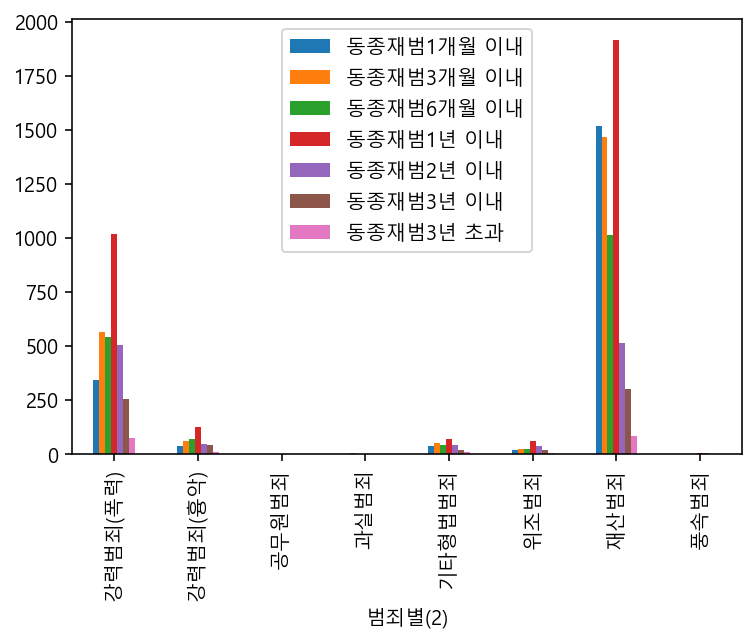

In [6]:
dt1_1_1.groupby('범죄별(2)')['동종재범1개월 이내','동종재범3개월 이내','동종재범6개월 이내','동종재범1년 이내','동종재범2년 이내','동종재범3년 이내','동종재범3년 초과'].mean().plot.bar()

In [7]:
dt1_1_2 = dt1_1[['범죄별(1)','범죄별(2)','범죄별(3)','이종재범소계','이종재범1개월 이내','이종재범3개월 이내','이종재범6개월 이내','이종재범1년 이내','이종재범2년 이내','이종재범3년 이내','이종재범3년 초과']]
dt1_1_2 = dt1_1_2[dt1_1_2['범죄별(3)']=='소계']
dt1_1_2 = dt1_1_2.replace('-','0')
dt1_1_2 =pd.DataFrame(dt1_1_2)
dt1_1_2

,범죄별(1),범죄별(2),범죄별(3),이종재범소계,이종재범1개월 이내,이종재범3개월 이내,이종재범6개월 이내,이종재범1년 이내,이종재범2년 이내,이종재범3년 이내,이종재범3년 초과
4,형법범,재산범죄,소계,6415,1332,1375,947,1787,559,284,131
11,형법범,강력범죄(흉악),소계,480,51,64,63,149,74,56,23
16,형법범,강력범죄(폭력),소계,3334,332,551,463,1081,558,260,89
25,형법범,위조범죄,소계,260,17,35,37,79,56,25,11
30,형법범,공무원범죄,소계,0,0,0,0,0,0,0,0
35,형법범,풍속범죄,소계,26,1,4,4,3,4,9,1
39,형법범,과실범죄,소계,13,2,2,2,4,3,0,0
43,형법범,기타형법범죄,소계,346,38,58,39,102,54,40,15


In [8]:
dt1_1_2['이종재범소계'] = dt1_1_2['이종재범소계'].astype(float)
dt1_1_2['이종재범1개월 이내'] = dt1_1_2['이종재범1개월 이내'].astype(float)
dt1_1_2['이종재범3개월 이내'] = dt1_1_2['이종재범3개월 이내'].astype(float)
dt1_1_2['이종재범6개월 이내'] = dt1_1_2['이종재범6개월 이내'].astype(float)
dt1_1_2['이종재범1년 이내'] = dt1_1_2['이종재범1년 이내'].astype(float)
dt1_1_2['이종재범2년 이내'] = dt1_1_2['이종재범2년 이내'].astype(float)
dt1_1_2['이종재범3년 이내'] = dt1_1_2['이종재범3년 이내'].astype(float)
dt1_1_2['이종재범3년 초과'] = dt1_1_2['이종재범3년 초과'].astype(float)

###### 형법 이종 재범 분석 결과 역시 재산범죄가 압도적으로 높게 나타났고, 1년 이내의 기간에 가장 많이 발생하였으며 1~3개월 이내에 특히 높게 나타남을 알 수 있다. 재산 범죄 다음으로는 폭력 강력범죄가 다음으로 많이 나타났으며 역시 1년 이내의 기간이 가장 높음을 알 수 있다.

<ipython-input-9-ab9c8ab5c877>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt1_1_2.groupby('범죄별(2)')['이종재범1개월 이내','이종재범3개월 이내','이종재범6개월 이내','이종재범1년 이내','이종재범2년 이내','이종재범3년 이내','이종재범3년 초과'].mean().plot.bar()


<AxesSubplot:xlabel='범죄별(2)'>

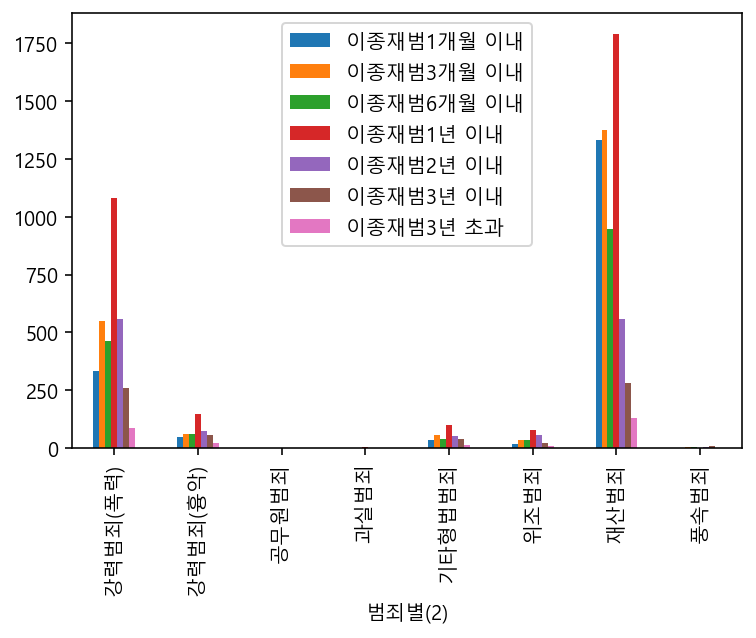

In [9]:
dt1_1_2.groupby('범죄별(2)')['이종재범1개월 이내','이종재범3개월 이내','이종재범6개월 이내','이종재범1년 이내','이종재범2년 이내','이종재범3년 이내','이종재범3년 초과'].mean().plot.bar()

### 범죄별1 : 형법, 특별법 분류
### 범죄별2 : 범죄별1의 종류 분류
### 범죄별3 : 범죄별2의 소계 값 분류
### 특별법범 내에서 '동종 재범'과 '이종 재범' 분류

In [10]:
dt1_2 = dt1[dt1['범죄별(1)']=='특별법범']
dt1_2 = dt1_2.drop(dt1_2.index[0])
dt1_2_1 = dt1_2[['범죄별(1)','범죄별(2)','범죄별(3)','동종재범소계','동종재범1개월 이내','동종재범3개월 이내','동종재범6개월 이내','동종재범1년 이내','동종재범2년 이내','동종재범3년 이내','동종재범3년 초과']]
dt1_2_1 = dt1_2_1[dt1_2_1['범죄별(3)']=='소계']
dt1_2_1 = dt1_2_1.replace('-','0')
dt1_2_1 = pd.DataFrame(dt1_2_1)
dt1_2_1

,범죄별(1),범죄별(2),범죄별(3),동종재범소계,동종재범1개월 이내,동종재범3개월 이내,동종재범6개월 이내,동종재범1년 이내,동종재범2년 이내,동종재범3년 이내,동종재범3년 초과
61,특별법범,개발제한구역의지정및관리에관한특별조치법,소계,0,0,0,0,0,0,0,0
62,특별법범,개인정보보호법,소계,0,0,0,0,0,0,0,0
63,특별법범,건축법,소계,0,0,0,0,0,0,0,0
64,특별법범,게임산업진흥에관한법률,소계,5,0,2,0,0,1,1,1
65,특별법범,경범죄처벌법,소계,11,2,1,5,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
117,특별법범,폐기물관리법,소계,0,0,0,0,0,0,0,0
118,특별법범,풍속영업의규제에관한법률,소계,0,0,0,0,0,0,0,0
119,특별법범,학원의설립운영및과외교습에관한법률,소계,0,0,0,0,0,0,0,0
120,특별법범,화물자동차운수사업법,소계,0,0,0,0,0,0,0,0


In [11]:
dt1_2_1['동종재범소계'] = dt1_2_1['동종재범소계'].astype(float)
dt1_2_1['동종재범1개월 이내'] = dt1_2_1['동종재범1개월 이내'].astype(float)
dt1_2_1['동종재범3개월 이내'] = dt1_2_1['동종재범3개월 이내'].astype(float)
dt1_2_1['동종재범6개월 이내'] = dt1_2_1['동종재범6개월 이내'].astype(float)
dt1_2_1['동종재범1년 이내'] = dt1_2_1['동종재범1년 이내'].astype(float)
dt1_2_1['동종재범2년 이내'] = dt1_2_1['동종재범2년 이내'].astype(float)
dt1_2_1['동종재범3년 이내'] = dt1_2_1['동종재범3년 이내'].astype(float)
dt1_2_1['동종재범3년 초과'] = dt1_2_1['동종재범3년 초과'].astype(float)

###### 특별법 동종 재범 분석 결과 1년 이내 도로교통법 범죄가 가장 높게 나타났고, 그다음으로 교통사고처리 특례법 범죄 순으로 나타났다.

<ipython-input-12-ac78cf1157ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt1_2_1.groupby('범죄별(2)')['동종재범1개월 이내','동종재범3개월 이내','동종재범6개월 이내','동종재범1년 이내','동종재범2년 이내','동종재범3년 이내','동종재범3년 초과'].mean().plot.bar(figsize=(15,4))


<AxesSubplot:xlabel='범죄별(2)'>

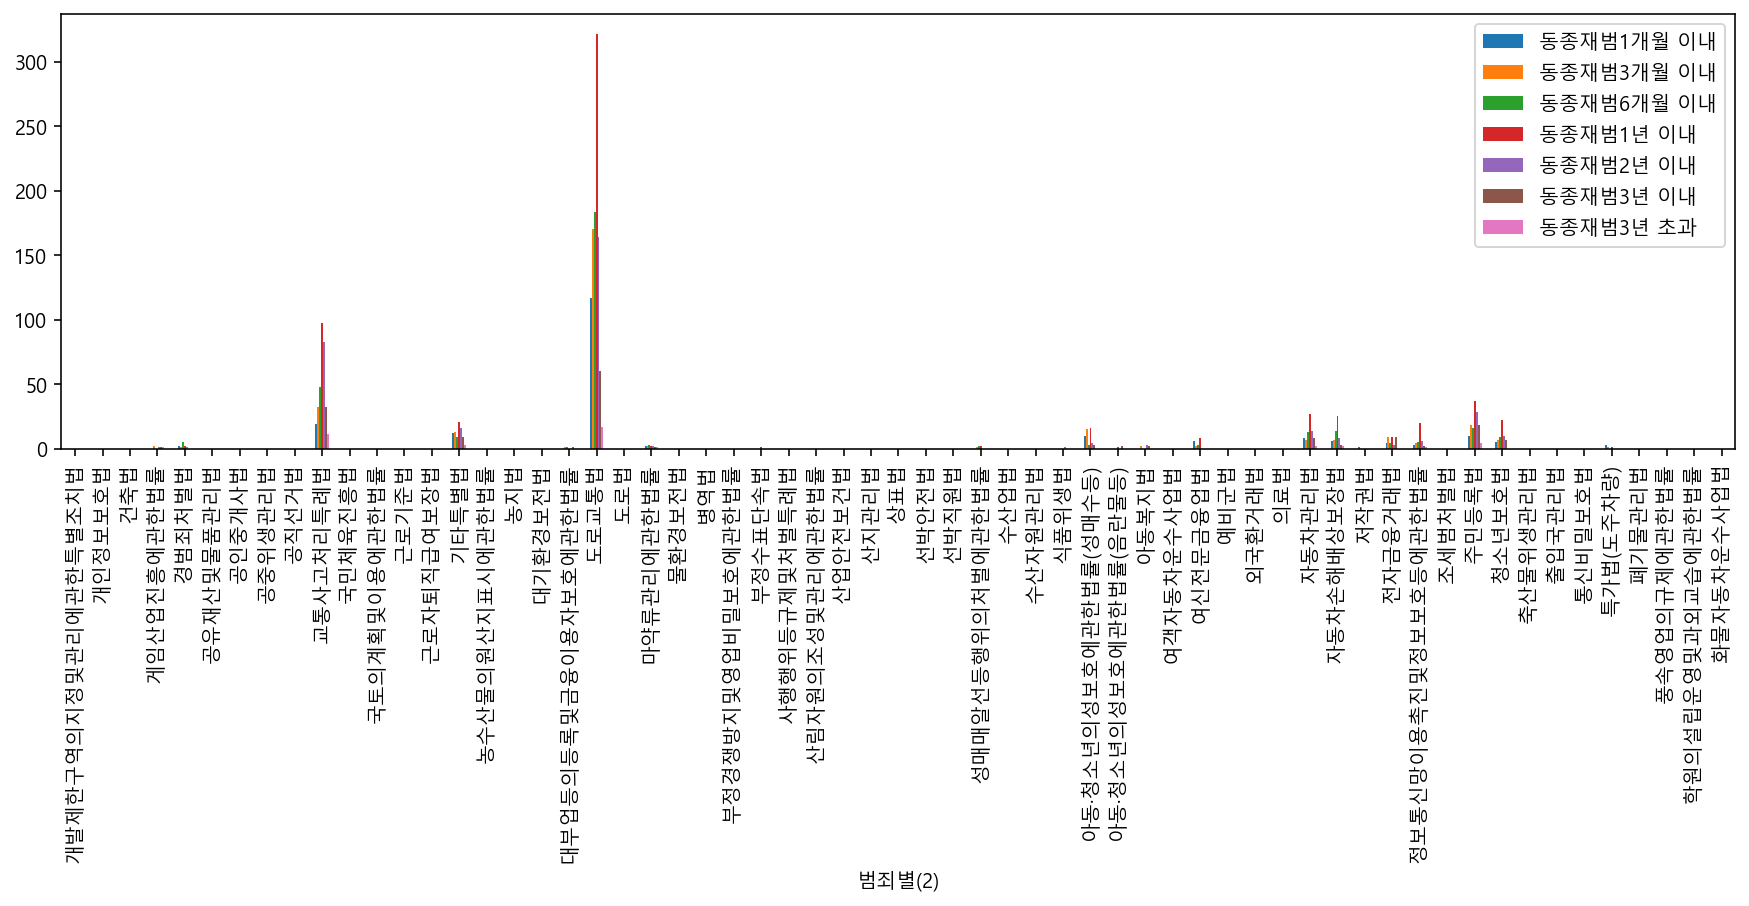

In [12]:
dt1_2_1.groupby('범죄별(2)')['동종재범1개월 이내','동종재범3개월 이내','동종재범6개월 이내','동종재범1년 이내','동종재범2년 이내','동종재범3년 이내','동종재범3년 초과'].mean().plot.bar(figsize=(15,4))

In [13]:
dt1_2_2 = dt1_2[['범죄별(1)','범죄별(2)','범죄별(3)','이종재범소계','이종재범1개월 이내','이종재범3개월 이내','이종재범6개월 이내','이종재범1년 이내','이종재범2년 이내','이종재범3년 이내','이종재범3년 초과']]
dt1_2_2 = dt1_2_2[dt1_2_2['범죄별(3)']=='소계']
dt1_2_2 = dt1_2_2.replace('-','0')
dt1_2_2 = pd.DataFrame(dt1_2_2)
dt1_2_2

,범죄별(1),범죄별(2),범죄별(3),이종재범소계,이종재범1개월 이내,이종재범3개월 이내,이종재범6개월 이내,이종재범1년 이내,이종재범2년 이내,이종재범3년 이내,이종재범3년 초과
61,특별법범,개발제한구역의지정및관리에관한특별조치법,소계,0,0,0,0,0,0,0,0
62,특별법범,개인정보보호법,소계,0,0,0,0,0,0,0,0
63,특별법범,건축법,소계,0,0,0,0,0,0,0,0
64,특별법범,게임산업진흥에관한법률,소계,5,0,1,1,1,0,1,1
65,특별법범,경범죄처벌법,소계,27,3,6,1,12,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
117,특별법범,폐기물관리법,소계,0,0,0,0,0,0,0,0
118,특별법범,풍속영업의규제에관한법률,소계,0,0,0,0,0,0,0,0
119,특별법범,학원의설립운영및과외교습에관한법률,소계,0,0,0,0,0,0,0,0
120,특별법범,화물자동차운수사업법,소계,0,0,0,0,0,0,0,0


In [14]:
dt1_2_2['이종재범소계'] = dt1_2_2['이종재범소계'].astype(float)
dt1_2_2['이종재범1개월 이내'] = dt1_2_2['이종재범1개월 이내'].astype(float)
dt1_2_2['이종재범3개월 이내'] = dt1_2_2['이종재범3개월 이내'].astype(float)
dt1_2_2['이종재범6개월 이내'] = dt1_2_2['이종재범6개월 이내'].astype(float)
dt1_2_2['이종재범1년 이내'] = dt1_2_2['이종재범1년 이내'].astype(float)
dt1_2_2['이종재범2년 이내'] = dt1_2_2['이종재범2년 이내'].astype(float)
dt1_2_2['이종재범3년 이내'] = dt1_2_2['이종재범3년 이내'].astype(float)
dt1_2_2['이종재범3년 초과'] = dt1_2_2['이종재범3년 초과'].astype(float)

###### 특별법 이종 재범 분석 결과 마찬가지로 1년 이내 도로교통법 범죄가 가장 높게 나타났고, 그다음으로 교통사고처리 특례법 범죄 순으로 나타났다.

<ipython-input-15-4fa8e7ee6f5f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt1_2_2.groupby('범죄별(2)')['이종재범1개월 이내','이종재범3개월 이내','이종재범6개월 이내','이종재범1년 이내','이종재범2년 이내','이종재범3년 이내','이종재범3년 초과'].mean().plot.bar(figsize=(15,4))


<AxesSubplot:xlabel='범죄별(2)'>

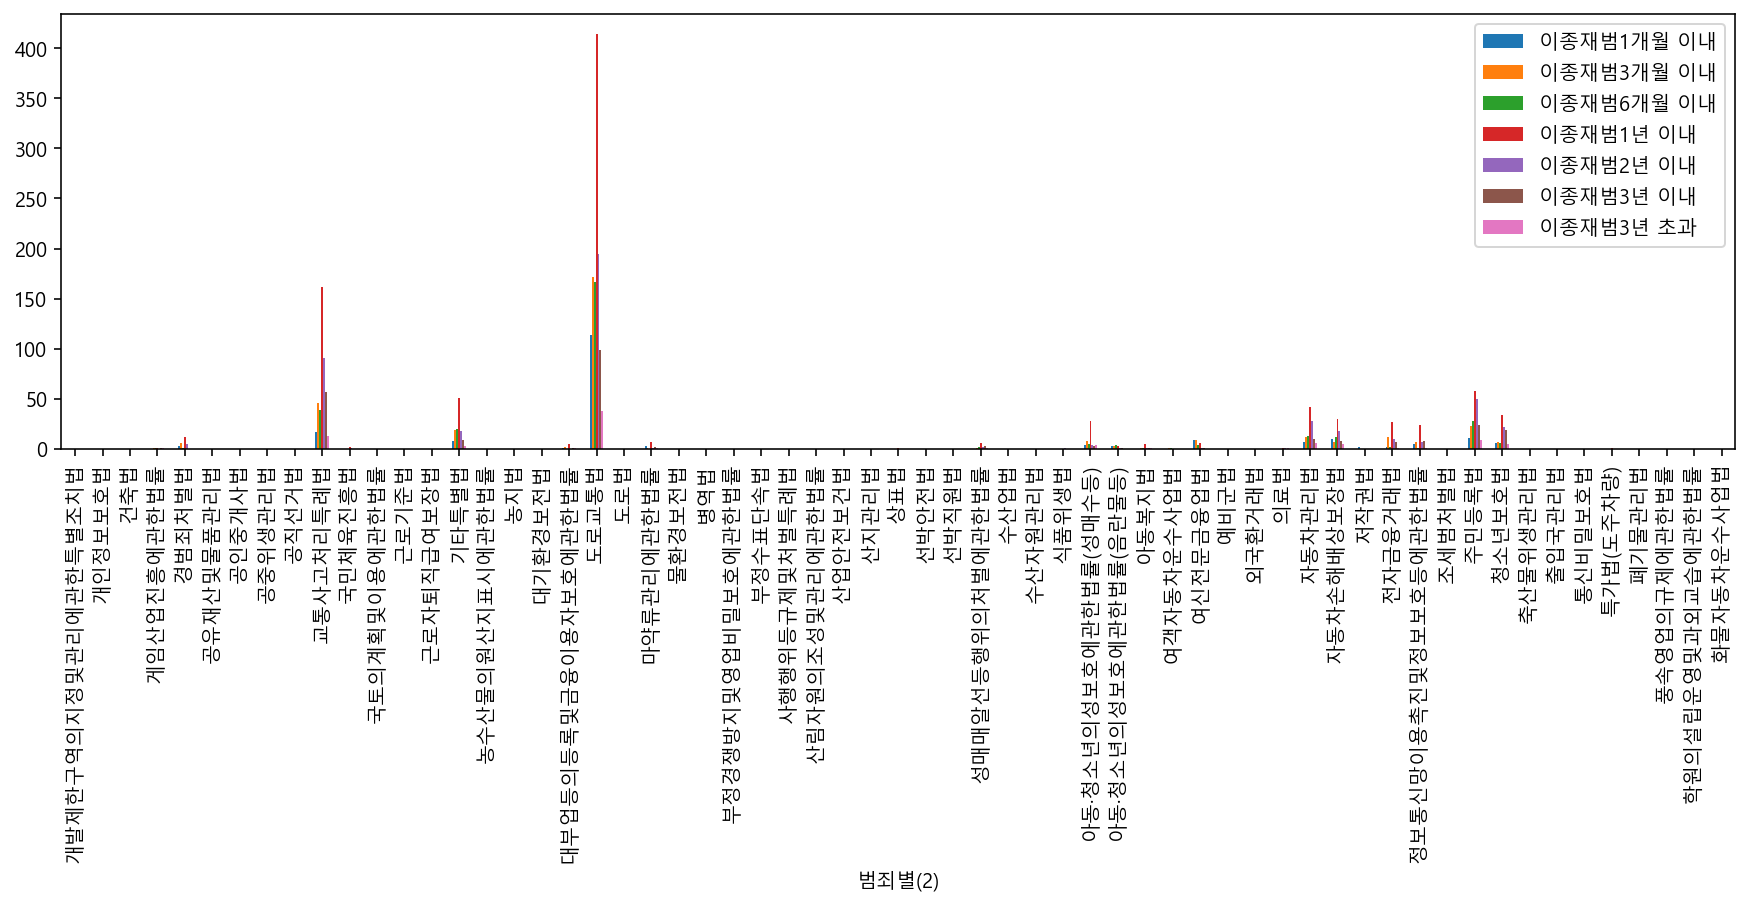

In [15]:
dt1_2_2.groupby('범죄별(2)')['이종재범1개월 이내','이종재범3개월 이내','이종재범6개월 이내','이종재범1년 이내','이종재범2년 이내','이종재범3년 이내','이종재범3년 초과'].mean().plot.bar(figsize=(15,4))